In [1]:
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
### Importing data

# Comparing insert sort and merge sort
dataInsertMergeLargeN = pd.read_csv("./result/result_InsertMerge.csv")
dataInsertMergeSmallN = pd.read_csv("./result/result_InsertMergeFocused.csv")

In [3]:
dataInsertMergeLargeN.describe()

,n,insertTime,mergeTime
count,6.000000,6.000000,6.000000
mean,26000.833333,104969.769835,64.659238
std,18075.250398,109161.265611,47.630441
min,1617.000000,285.066843,2.956867
25%,14301.750000,24370.303035,32.902360
50%,25904.000000,75694.087625,62.317014
75%,37697.500000,158351.923943,95.148087
max,50517.000000,284978.466034,131.175280


In [4]:
dataInsertMergeSmallN.describe()

,n,insertTime,mergeTime
count,25314.000000,25314.000000,25314.000000
mean,51.310026,0.625964,0.061035
std,55.704103,2.753011,0.084817
min,2.000000,0.000000,0.000000
25%,22.000000,0.051260,0.020981
50%,43.000000,0.200033,0.046253
75%,71.000000,0.549078,0.082970
max,609.000000,40.160894,1.052141


# Comparing Insert Sort and Merge Sort with Large N

In [5]:
# Creating sub dataframes
insertLargeN = dataInsertMergeLargeN[["n","insertTime"]]
mergeLargeN = dataInsertMergeLargeN[["n","mergeTime"]]

Text(0.5, 1.0, 'Merge Sort')

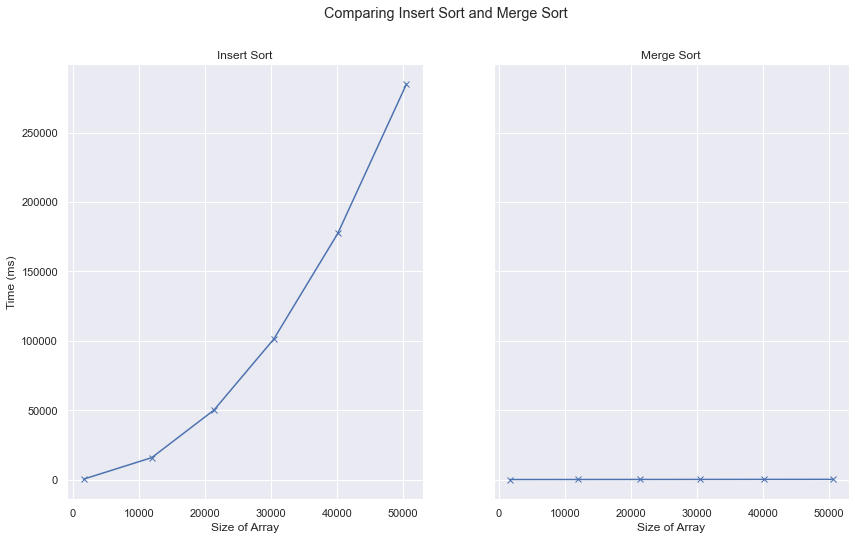

In [6]:
# Plot
# sns.scatterplot(data=dataInsertMergeLargeN, x='n', y='insertTime')

fig, ax1 = plt.subplots(1, 2, figsize=(14,8), sharey=True)

fig.suptitle("Comparing Insert Sort and Merge Sort")

ax1[0].plot(insertLargeN['n'],insertLargeN['insertTime'], 'x-')
ax1[0].set_ylabel('Time (ms)')
ax1[0].set_xlabel('Size of Array')
ax1[0].set_title('Insert Sort')

ax1[1].plot(mergeLargeN['n'],mergeLargeN['mergeTime'], 'x-')
ax1[1].set_xlabel('Size of Array')
ax1[1].set_title('Merge Sort')



# Finding best cross over point

In [7]:
# Creating sub dataframes
insertSmallN = dataInsertMergeSmallN[["n","insertTime"]]
mergeSmallN = dataInsertMergeSmallN[["n","mergeTime"]]

Text(0.5, 1.0, 'Merge Sort')

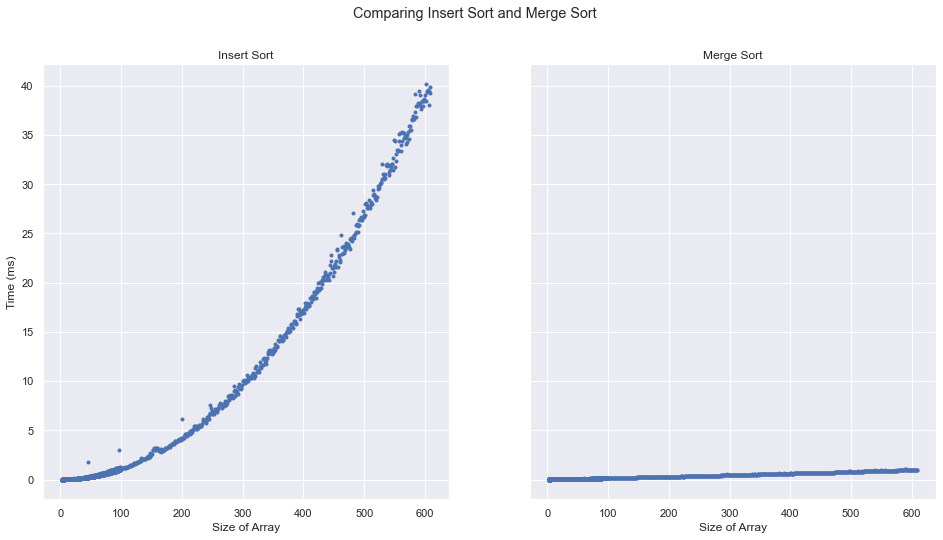

In [8]:
fig2, ax2 = plt.subplots(1, 2, figsize=(16,8), sharey=True)

fig2.suptitle("Comparing Insert Sort and Merge Sort")

ax2[0].plot(insertSmallN['n'],insertSmallN['insertTime'], '.')
ax2[0].set_ylabel('Time (ms)')
ax2[0].set_xlabel('Size of Array')
ax2[0].set_title('Insert Sort')

ax2[1].plot(mergeSmallN['n'],mergeSmallN['mergeTime'], '.')
ax2[1].set_xlabel('Size of Array')
ax2[1].set_title('Merge Sort')

## Initial Findings
We can observe that even at a significantly smaller N, the difference in time complexity between Insert Sort and Merge Sort is very prominant. We'll compare the data where N<=15.

In [40]:
# New dataframe
dataFiltered = dataInsertMergeSmallN[(dataInsertMergeSmallN.n <= 15) & (dataInsertMergeSmallN.insertTime <= 0.04)]
dataFiltered.describe()

,n,insertTime,mergeTime
count,4519.000000,4519.000000,4519.000000
mean,8.127241,0.009847,0.006692
std,4.136554,0.008038,0.004016
min,2.000000,0.000000,0.000000
25%,4.000000,0.002861,0.003099
50%,8.000000,0.007868,0.006199
75%,12.000000,0.015974,0.010014
max,15.000000,0.037909,0.020027


Text(0.5, 1.0, 'Merge Sort')

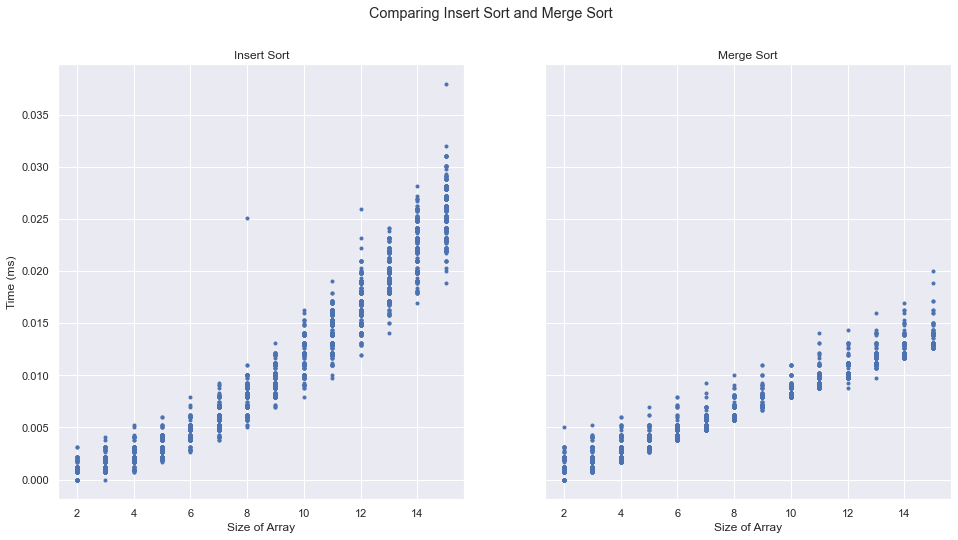

In [10]:
# Creating sub dataframes
insertFiltered = dataFiltered[["n","insertTime"]]
mergeFiltered = dataFiltered[["n","mergeTime"]]

# Plotting
fig3, ax3 = plt.subplots(1, 2, figsize=(16,8), sharey=True)

fig3.suptitle("Comparing Insert Sort and Merge Sort")

ax3[0].plot(dataFiltered['n'],dataFiltered['insertTime'], '.')
ax3[0].set_ylabel('Time (ms)')
ax3[0].set_xlabel('Size of Array')
ax3[0].set_title('Insert Sort')

ax3[1].plot(dataFiltered['n'],dataFiltered['mergeTime'], '.')
ax3[1].set_xlabel('Size of Array')
ax3[1].set_title('Merge Sort')

## Finding optimal `n`

We can observe that in both scatter plots, the region where `n<=8` is very similar. Furthermore, it is obvious that the time taken for Insert Sort is higher than that of Merge Sort when `n>8`.

Since the region of interest (`2<=n<=8`) is very small, we can estimate the smaller region using linear functions to determine the most optimal `n` such that `timeInsertSort(x<n)` is less than `timeMergeSort(x<n)`.

In [55]:
# Trimming data size down to region of interest
dataInterest = dataInsertMergeSmallN[(dataInsertMergeSmallN.n <= 8)]

nReshaped = dataInterest['n'].to_numpy().reshape((-1,1))

In [12]:
# Fitting models
insertModel = LinearRegression().fit(nReshaped, dataInterest['insertTime'])
mergeModel = LinearRegression().fit(nReshaped, dataInterest['mergeTime'])

print(f"Pearson Correlation\nInsert: {insertModel.score(nReshaped, dataInterest['insertTime'])}\nMerge: {mergeModel.score(nReshaped, dataInterest['mergeTime'])}")

Pearson Correlation
Insert: 0.8654554966937785
Merge: 0.8859780369226069


In [13]:
# Plotting predictions
rangeOfX = np.arange(9).reshape((-1,1))
predInsert = insertModel.predict(rangeOfX)
predMerge = mergeModel.predict(rangeOfX)

In [14]:
# Creating a new DF for merged data and stacked
predColumns = ['n','Algo','time']

predData = ({
    'n': [x for x in range(len(predInsert))]+[x for x in range(len(predMerge))],
    'Algo': ['Insert' for x in range(len(predInsert))]+['Merge' for x in range(len(predMerge))],
    'time': np.concatenate([predInsert, predMerge])
})

predDataDF = pd.DataFrame.from_dict(predData)

<AxesSubplot:xlabel='n', ylabel='time'>

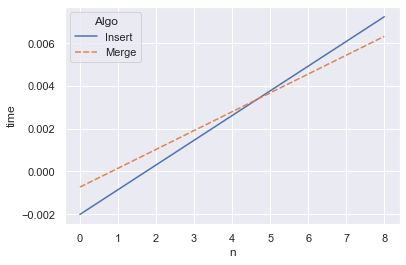

In [15]:
sns.lineplot(data=predDataDF, x='n', y='time', hue='Algo', style='Algo')

## Graphing Insertion Sort, Merge Sort, and Hybrid of both sorts

### Importing data from CSV file

In [65]:
# Import data for all 3 sorts

dataInsertMergeHybridSmallN = pd.read_csv("./result/result_InsertMergeHybridFocusedN_4.csv")

dataInsertMergeHybridSmallN.head()

,n,algo,time,comparisons
0,2,insert,0.002146,1
1,2,merge,0.001907,1
2,2,hybrid,0.002146,1
3,3,insert,0.001907,3
4,3,merge,0.003099,3


### Filter by Algorithm used

In [66]:
# Filter by algorithm type
dataInsertSmallN = dataInsertMergeHybridSmallN[(dataInsertMergeHybridSmallN['algo'] == "insert")]
dataMergeSmallN = dataInsertMergeHybridSmallN[(dataInsertMergeHybridSmallN['algo'] == "merge")]
dataHybridSmallN = dataInsertMergeHybridSmallN[(dataInsertMergeHybridSmallN['algo'] == "hybrid")]

### Plot scatter plots of the three Algorithms

Text(0.5, 1.0, 'Hybrid')

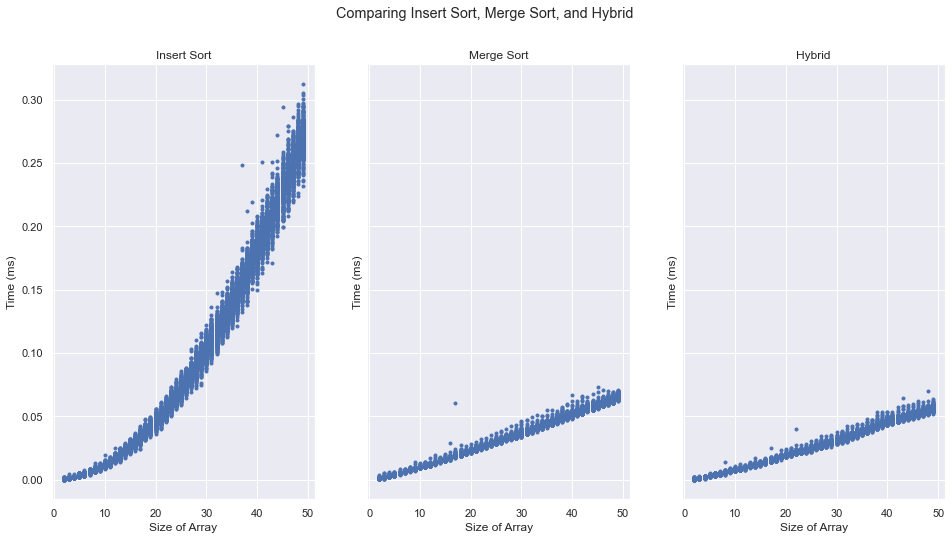

In [67]:
fig4, ax4 = plt.subplots(1, 3, figsize=(16,8), sharey=True)

fig4.suptitle("Comparing Insert Sort, Merge Sort, and Hybrid")

ax4[0].plot(dataInsertSmallN['n'],dataInsertSmallN['time'], '.')
ax4[0].set_ylabel('Time (ms)')
ax4[0].set_xlabel('Size of Array')
ax4[0].set_title('Insert Sort')

ax4[1].plot(dataMergeSmallN['n'],dataMergeSmallN['time'], '.')
ax4[1].set_ylabel('Time (ms)')
ax4[1].set_xlabel('Size of Array')
ax4[1].set_title('Merge Sort')

ax4[2].plot(dataHybridSmallN['n'],dataHybridSmallN['time'], '.')
ax4[2].set_ylabel('Time (ms)')
ax4[2].set_xlabel('Size of Array')
ax4[2].set_title('Hybrid')

### Narrow down `N`

Text(0.5, 1.0, 'Hybrid')

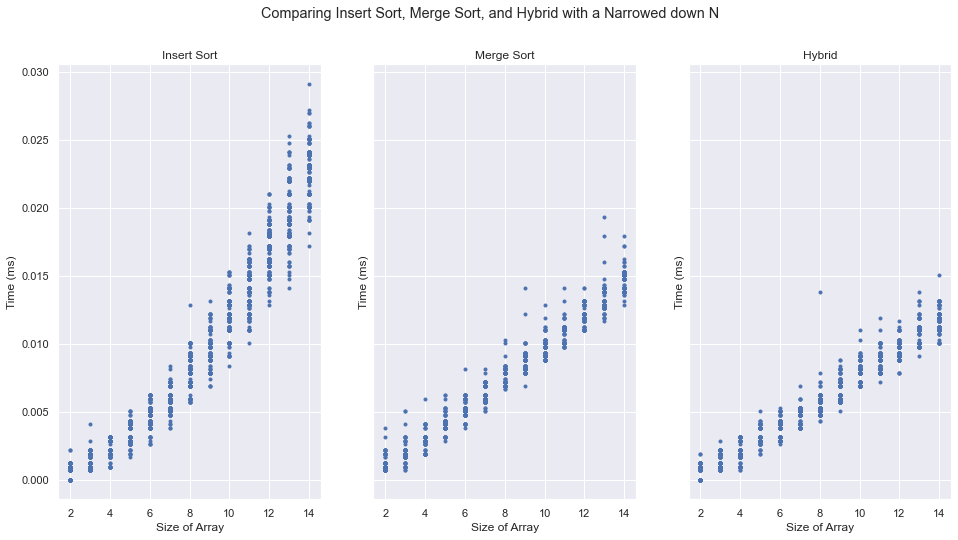

In [64]:
narrow = 15

dataInsertNarrowN = dataInsertSmallN[(dataInsertSmallN['n'] < narrow)]
dataMergeNarrowN = dataMergeSmallN[(dataMergeSmallN['n'] < narrow)]
dataHybridNarrowN = dataHybridSmallN[(dataHybridSmallN['n'] < narrow)]

fig5, ax5 = plt.subplots(1, 3, figsize=(16,8), sharey=True)

fig5.suptitle("Comparing Insert Sort, Merge Sort, and Hybrid with a Narrowed down N")

ax5[0].plot(dataInsertNarrowN['n'],dataInsertNarrowN['time'], '.')
ax5[0].set_ylabel('Time (ms)')
ax5[0].set_xlabel('Size of Array')
ax5[0].set_title('Insert Sort')

ax5[1].plot(dataMergeNarrowN['n'],dataMergeNarrowN['time'], '.')
ax5[1].set_ylabel('Time (ms)')
ax5[1].set_xlabel('Size of Array')
ax5[1].set_title('Merge Sort')

ax5[2].plot(dataHybridNarrowN['n'],dataHybridNarrowN['time'], '.')
ax5[2].set_ylabel('Time (ms)')
ax5[2].set_xlabel('Size of Array')
ax5[2].set_title('Hybrid')